In [3]:
!pip install kaggle


In [33]:
import os
import pandas as pd
from zipfile import ZipFile

# Set your Kaggle credentials (this step can be skipped if the kaggle.json file is correctly placed)
os.environ['KAGGLE_USERNAME'] = input()
os.environ['KAGGLE_KEY'] = input()

# Define the dataset you want to download (example: Titanic dataset)
dataset = 'titanic'

# Download the dataset using Kaggle API
!kaggle competitions download -c {dataset}

# Unzip the downloaded file
with ZipFile(f'{dataset}.zip', 'r') as zip_ref:
    zip_ref.extractall(dataset)

# Load the dataset into a pandas DataFrame
df = pd.read_csv(f'{dataset}/train.csv')
df.head()

debanjankonar
7eeec0093b4cab089156e21bd539c251
titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Null Values in Train data
Age         177
Cabin       687
Embarked      2
dtype: int64


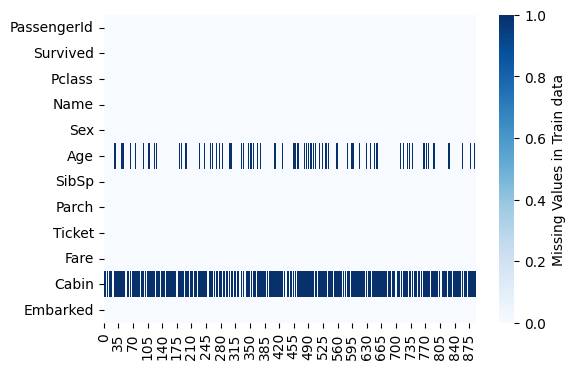

In [8]:
print("Null Values in Train data")
df_null  = df.isnull().sum()
print(df_null[df_null>0])

plt.figure(figsize=(6, 4))
sns.heatmap(df.isna().transpose(), cmap="Blues", cbar_kws={'label': 'Missing Values in Train data'})
plt.show()

In [9]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


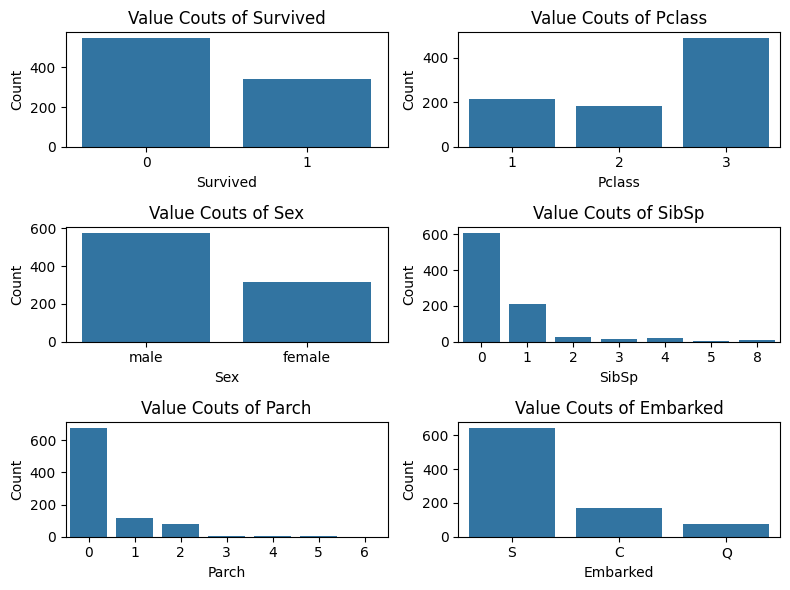

In [10]:
traindf_pl = [df['Survived'], df['Pclass'], df['Sex'], df['SibSp'], df['Parch'], df['Embarked']]
plot_names = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 6))
for i, ax in enumerate(axes.flatten()):
    sns.countplot(x=traindf_pl[i], ax=ax)
    ax.set_title(f'Value Couts of {plot_names[i]}')
    ax.set_xlabel(plot_names[i])
    ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

<ipython-input-14-1af448f732c2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Survived', y='Age', data=df.dropna(), palette="mako", split=True);


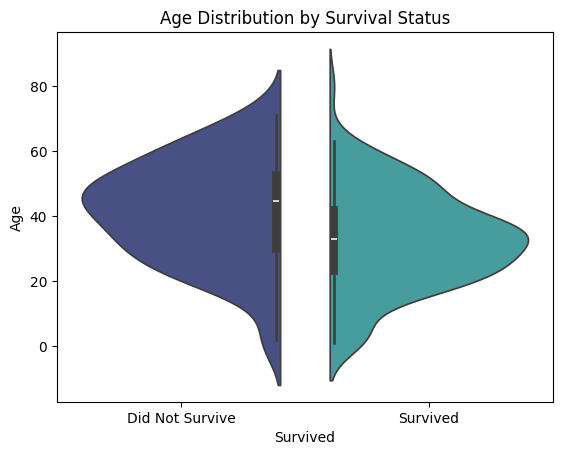

In [14]:
sns.violinplot(x='Survived', y='Age', data=df.dropna(), palette="mako", split=True);
plt.title('Age Distribution by Survival Status');
plt.xlabel('Survived'); plt.ylabel('Age');
plt.xticks([0, 1], ['Did Not Survive', 'Survived']); plt.show()


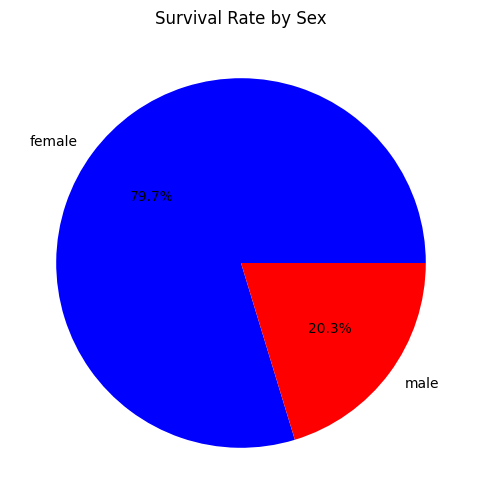

In [15]:
survived_sex = df.groupby(['Sex'])['Survived'].mean()
plt.figure(figsize=(8, 6))
plt.pie(survived_sex, labels=survived_sex.index, autopct='%1.1f%%', colors=['blue', 'red'])
plt.title('Survival Rate by Sex')
plt.show()

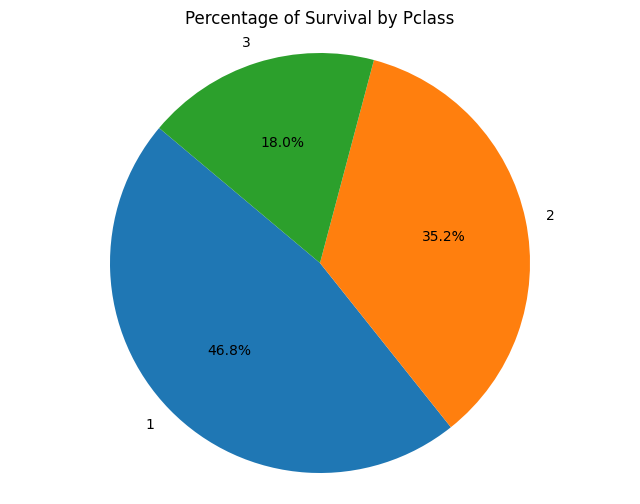

In [16]:
survived_percentage = df.groupby('Pclass')['Survived'].mean() * 100
plt.figure(figsize=(8, 6))
plt.pie(survived_percentage, labels=survived_percentage.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Survival by Pclass')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [17]:
features = ['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']

In [18]:
num_features, cat_features = [],[]

for i in features:
    if df[i].dtype=='object':
        cat_features.append(i)
#     elif i=='Pclass':
#         continue
    else:
        num_features.append(i)

num_features, cat_features

(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], ['Sex', 'Embarked'])

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df['Survived'], test_size=0.15, random_state=42, shuffle=True)
X_train.shape, X_test.shape

((757, 7), (134, 7))

In [21]:
num_transformer=Pipeline(steps=[
    ('num_imputer',SimpleImputer(strategy='mean')),
    ('scaler',MinMaxScaler())
])
cat_transformer=Pipeline(steps=[
    ('cat_imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(handle_unknown='error',drop='first'))
])

In [22]:
preprocess=ColumnTransformer(transformers=[
    ('num',num_transformer,num_features),
    ('cat',cat_transformer,cat_features)
])

In [23]:
from sklearn.svm import SVC

svc_model=Pipeline(steps=[
    ('preprocess',preprocess),
    ('model',SVC(random_state=42,class_weight='balanced'))
])

svc_model.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Sex', 'Embarked'])])),
                ('model', SVC(class_weight='balanced', random_state=42))])

In [24]:
print(classification_report(svc_model.predict(X_train),y_train))
print(classification_report(svc_model.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       491
           1       0.70      0.75      0.72       266

    accuracy                           0.80       757
   macro avg       0.78      0.79      0.78       757
weighted avg       0.80      0.80      0.80       757

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        81
           1       0.73      0.77      0.75        53

    accuracy                           0.80       134
   macro avg       0.79      0.79      0.79       134
weighted avg       0.80      0.80      0.80       134



In [25]:
from sklearn.tree import DecisionTreeClassifier

dt_model=Pipeline(steps=[
    ('preprocess',preprocess),
    ('model',DecisionTreeClassifier(random_state=42,class_weight='balanced'))
])

dt_model.fit(X_train,y_train)

print(classification_report(dt_model.predict(X_train),y_train))
print(classification_report(dt_model.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       464
           1       0.99      0.96      0.97       293

    accuracy                           0.98       757
   macro avg       0.98      0.98      0.98       757
weighted avg       0.98      0.98      0.98       757

              precision    recall  f1-score   support

           0       0.81      0.86      0.83        73
           1       0.82      0.75      0.79        61

    accuracy                           0.81       134
   macro avg       0.81      0.81      0.81       134
weighted avg       0.81      0.81      0.81       134



In [26]:
from sklearn.ensemble import RandomForestClassifier

rf_model=Pipeline(steps=[
    ('preprocess',preprocess),
    ('model',RandomForestClassifier(random_state=42,class_weight='balanced'))
])

rf_model.fit(X_train,y_train)

print(classification_report(rf_model.predict(X_train),y_train))
print(classification_report(rf_model.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       470
           1       0.98      0.97      0.97       287

    accuracy                           0.98       757
   macro avg       0.98      0.98      0.98       757
weighted avg       0.98      0.98      0.98       757

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        82
           1       0.77      0.83      0.80        52

    accuracy                           0.84       134
   macro avg       0.83      0.83      0.83       134
weighted avg       0.84      0.84      0.84       134



In [28]:
test_df=pd.read_csv(f'{dataset}/test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [29]:
test_preds1 = rf_model.predict(test_df[features])
test_preds2 = dt_model.predict(test_df[features])
test_preds3 = svc_model.predict(test_df[features])

In [30]:
sum(test_preds1==test_preds2),sum(test_preds2==test_preds3), sum(test_preds1==test_preds3), len(test_df)

(374, 324, 342, 418)

In [31]:
ans_df=pd.DataFrame({'PassengerId':test_df['PassengerId'], 'Survived':test_preds1})
ans_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [32]:
ans_df.to_csv('ans.csv',index=False)